In [ ]:
!pip3 install torch torchvision

In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/datasets.zip"

test/골프/1.jpg:  mismatching "local" filename (test/ъ│иэФД/1.jpg),
         continuing with "central" filename version
test/골프/10.jpg:  mismatching "local" filename (test/ъ│иэФД/10.jpg),
         continuing with "central" filename version
test/골프/100.jpg:  mismatching "local" filename (test/ъ│иэФД/100.jpg),
         continuing with "central" filename version
test/골프/11.jpg:  mismatching "local" filename (test/ъ│иэФД/11.jpg),
         continuing with "central" filename version
test/골프/12.jpg:  mismatching "local" filename (test/ъ│иэФД/12.jpg),
         continuing with "central" filename version
test/골프/13.jpg:  mismatching "local" filename (test/ъ│иэФД/13.jpg),
         continuing with "central" filename version
test/골프/14.jpg:  mismatching "local" filename (test/ъ│иэФД/14.jpg),
         continuing with "central" filename version
test/골프/15.jpg:  mismatching "local" filename (test/ъ│иэФД/15.jpg),
         continuing with "central" filename version
test/골프/16.jpg:  mismatching "local" fil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch import nn
from torchvision import datasets, transforms

%matplotlib inline

In [ ]:
# GPU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_classes = 6 # Class는 총 10개 - 'bear', 'bird', 'butterfly', 'car', 'cat', 'deer', 'dog', 'horse', 'sheep', 'tiger'
num_epochs = 30
batch_size = 100
learning_rate = 0.001

In [ ]:
# Transform
transform = transforms.Compose(
                   [transforms.Resize((32,32)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                   ])

transform_1 = transforms.Compose(
                   [transforms.RandomHorizontalFlip(p=1),
                    transforms.Resize((32,32)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                   ])

# Transform : 32 * 32 -> Tensor -> Normalize 정규화 0.5

In [ ]:
# Load Data - Train & Test
# Train 경로 : r"C:\Users\jason\Desktop\prography_dl\datasets\train"
# Test 경로 : r"C:\Users\jason\Desktop\prography_dl\datasets\test"

train_dataset = dset.ImageFolder(root = r"/content/train", transform=transform)
train_dataset += dset.ImageFolder(root = r"/content/train", transform=transform_1)
test_dataset = dset.ImageFolder(root = r"/content/test",transform=transform)

train_size=int(0.8*len(train_dataset))
validation_size=len(train_dataset)-train_size

train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset,[train_size, validation_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)

In [ ]:
# Class들
classes=('골프', '농구', '배구', '야구', '축구', '탁구')

In [ ]:
# 이미지 보여주기 위한 함수 정의

def imshow(image):
    image = image / 2 + 0.5
    numpy_image = image.numpy()
    plt.imshow(np.transpose(numpy_image, (1, 2, 0)))
    plt.show()

In [ ]:
# CNN 모델 정의하기
class CNNModel(nn.Module):
  #기본값 = 0.2, 학습시 20% 뉴런을 사용하지 않음
    def __init__(self, dropout_p=0.2):
        super(CNNModel, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 6, 3),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, 3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(576, 120), nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84), nn.ReLU()
        )
        self.fc3 = nn.Sequential(
            nn.Linear(84, 21), nn.ReLU()
        )
        self.fc4 = nn.Linear(21, num_classes)
        self.dropout_p = dropout_p

    def forward(self, x):
        out = self.layer1(x)
        #dropout 추가
        out = F.dropout(out, training = self.training, p = self.dropout_p)
        out = self.layer2(out)
        #dropout 추가
        out = F.dropout(out, training = self.training, p = self.dropout_p)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        return out

In [ ]:
model = CNNModel(dropout_p=0.2).to(device) #dropout_p=0.2
model

CNNModel(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=576, out_features=120, bias=True)
    (1): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU()
  )
  (fc3): Sequential(
    (0): Linear(in_features=84, out_features=21, bias=True)
    (1): ReLU()
  )
  (fc4): Linear(in_features=21, out_features=6, bias=True)
)

In [ ]:
# Loss
# Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 모델이 학습되는 동안 trainning loss를 track
train_losses = []
# 모델이 학습되는 동안 validation loss를 track
valid_losses = []
# epoch당 average training loss를 track
avg_train_losses = []
# epoch당 average validation loss를 track
avg_valid_losses = []

train_accuracy = []
valid_accuracy = []

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    total1=0
    correct1=0
    for i, (images, labels) in enumerate(train_loader, 1):
        images = images.to(device)
        labels = labels.to(device)

        # 최적화 -> Zero_gradient 활용
        optimizer.zero_grad()

        # Forward, Backward, Optimizer
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        total1 += labels.size(0)
        correct1 += (preds == labels).sum().item()

        train_losses.append(loss.item())

    # validation part
    total2 = 0
    correct2=0
    for i, (images, labels) in enumerate(validation_loader, 1):
        images = images.to(device)
        labels = labels.to(device)
        # forward pass: 입력된 값을 모델로 전달하여 예측 출력 계산
        outputs = model(images)

        # calculate the loss
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs.data, 1)
        total2 += labels.size(0)
        correct2 += (predicted == labels).sum().item()

        # record validation loss
        valid_losses.append(loss.item())

    train_acc = 100*(float(correct1)) / total1
    train_loss = np.average(train_losses)
    avg_train_losses.append(train_loss)
    train_accuracy.append(train_acc)


    valid_acc = 100*(float(correct2)) / total2
    valid_loss = np.average(valid_losses)
    avg_valid_losses.append(valid_loss)
    valid_accuracy.append(valid_acc)


    train_losses = []
    valid_losses = []

    
    print('[%d epoch]' %(epoch+1))
    print('train loss: %.8f, acc: %.8f' %(train_loss, train_acc))
    print('validation loss: %.8f, acc: %.8f' %(valid_loss, valid_acc))

print("END")

[1 epoch]
train loss: 1.72744397, acc: 23.02083333
validation loss: 1.57873631, acc: 40.41666667
[2 epoch]
train loss: 1.47065274, acc: 47.67361111
validation loss: 1.32003677, acc: 50.69444444
[3 epoch]
train loss: 1.21365138, acc: 57.01388889
validation loss: 1.08656627, acc: 62.08333333
[4 epoch]
train loss: 1.00018496, acc: 63.99305556
validation loss: 0.93052354, acc: 62.77777778
[5 epoch]
train loss: 0.90328382, acc: 66.73611111
validation loss: 0.85847941, acc: 70.00000000
[6 epoch]
train loss: 0.77257653, acc: 71.31944444
validation loss: 0.80709022, acc: 68.75000000
[7 epoch]
train loss: 0.69281857, acc: 73.68055556
validation loss: 0.71364495, acc: 74.86111111
[8 epoch]
train loss: 0.64573058, acc: 75.83333333
validation loss: 0.69853106, acc: 75.55555556
[9 epoch]
train loss: 0.59140992, acc: 78.33333333
validation loss: 0.61342582, acc: 76.11111111
[10 epoch]
train loss: 0.53700409, acc: 80.13888889
validation loss: 0.62659806, acc: 76.66666667
[11 epoch]
train loss: 0.5173

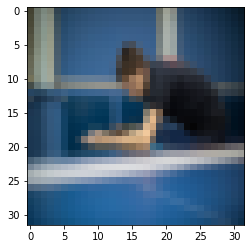

True : 탁구
Predicted : 탁구


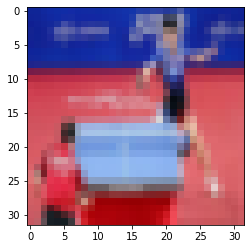

True : 탁구
Predicted : 탁구


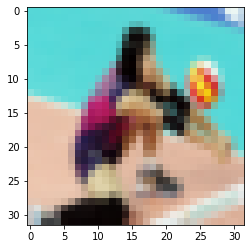

True : 배구
Predicted : 배구


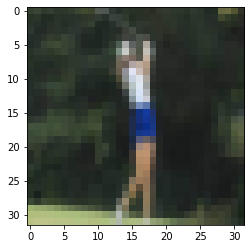

True : 골프
Predicted : 농구


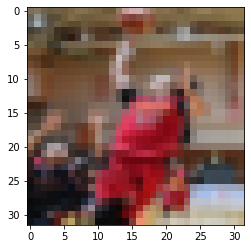

True : 농구
Predicted : 농구


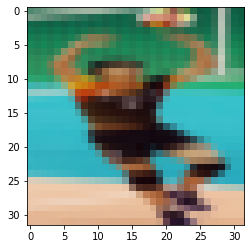

True : 배구
Predicted : 배구


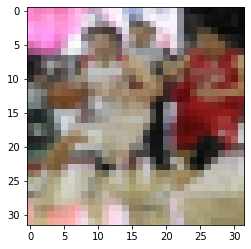

True : 농구
Predicted : 농구


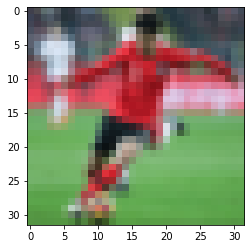

True : 축구
Predicted : 축구


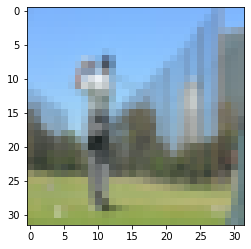

True : 골프
Predicted : 골프
Count : 498 / 600
Accuarcy : 83.000%


In [ ]:
# Test

count = 0
model.eval()  # To Evaluate Model

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
         # Predict
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        count += 1
        if count < 10:
            image = images[5].cpu()
            imshow(image)
            label = labels[5]
            print('True :', classes[label.item()])     
            print('Predicted :', classes[predicted[5].item()])

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print("Count : %d / %d" % (correct, total))
    print("Accuarcy : {:.3f}%".format(100*(float(correct)) / total))

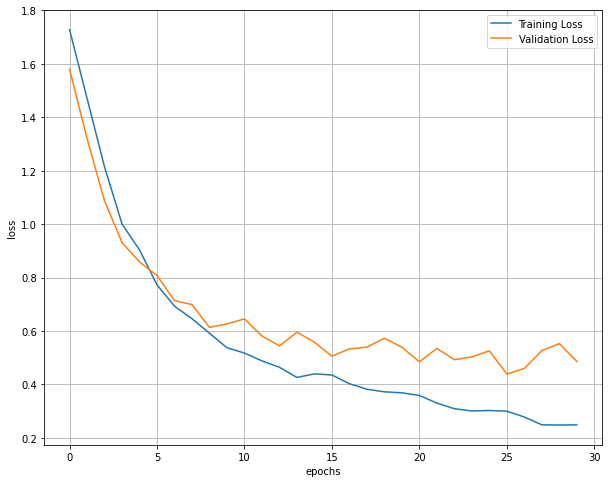

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(avg_train_losses, label='Training Loss')
plt.plot(avg_valid_losses,label='Validation Loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

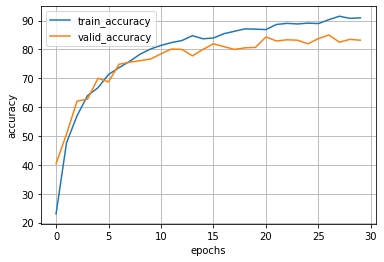

In [ ]:
fig = plt.figure()
plt.plot(train_accuracy, label='train_accuracy')
plt.plot(valid_accuracy,label='valid_accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()